 ### 데이터 불러오기

In [1]:
import pandas as pd

file = './data/KBO_2019_player_gamestats.csv'

raw = pd.read_csv(file,encoding='cp949')

In [2]:
raw.head(5)

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [3]:
raw.columns

Index(['팀', '이름', '생일', '일자', '상대', '결과', '타순', 'P', '선발', '타수', '득점', '안타',
       '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA'],
      dtype='object')

### 월별 기록 정리하기

일자 데이터를 사용해서 월 column을 만들도록 한다. 일자 데이터는 MM-DD와 같은 형식으로 되어 있다.

In [4]:
month_list = []
for month_with_date in raw['일자']:
    month, _ = month_with_date.split('-')
    month_list.append(month)
    
raw['월'] = month_list
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA,월
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429,03
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038,03
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146,03
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189,03
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166,03


필요 없는 컬럼들은 사용하지 않습니다.

In [5]:
columns = ['팀','이름', '생일', '일자', "상대", '타수', '안타', '홈런', "루타", "타점", '볼넷', '사구', '희비', '월']
data = raw[columns]
data.head()

,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비,월
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0,03
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0,03
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0,03
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0,03
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0,03


피벗 데이블을 이용해 월별 실적을 집계하겠습니다.<br>
fill_value = 0 옵션을 이용해 데이터가 비어있는 경우 0을 입력하도록 하겠습니다.

In [6]:
data_player_by_m = data.pivot_table(index = ['팀','이름','생일','월'],
                                values = ['타수', '안타', '홈런', "루타", "타점", '볼넷', '사구', '희비'],
                                aggfunc = 'sum')

data_player_by_m.head()

루타  볼넷  사구  안타  타수  타점  홈런  희비
팀   이름  생일         월                                 
KIA 고영창 1989-02-24 04   0   0   0   0   0   0   0   0
    김선빈 1989-12-18 03   5   4   0   3  18   0   0   0
                   04  17   3   0  13  44   6   0   0
                   05  31  10   0  24  82  10   1   2
                   06  29   8   1  24  81   8   1   0

In [7]:
data_player_by_m.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1261 entries, ('KIA', '고영창', '1989-02-24', '04') to ('한화', '호잉', '1989-05-18', '09')
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   루타      1261 non-null   int64
 1   볼넷      1261 non-null   int64
 2   사구      1261 non-null   int64
 3   안타      1261 non-null   int64
 4   타수      1261 non-null   int64
 5   타점      1261 non-null   int64
 6   홈런      1261 non-null   int64
 7   희비      1261 non-null   int64
dtypes: int64(8)
memory usage: 91.0+ KB


현재 인덱스로 정리된 팀/이름/생일/월 데이터를 컬럼으로 변경한다.

In [8]:
data_player_by_m = data_player_by_m.reset_index()

data_player_by_m.head()

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,고영창,1989-02-24,04,0,0,0,0,0,0,0,0
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0


지난번에 사용했던 타율/출루율/장타율/OPS 데이터를 만드는 함수를 사용합니다.

In [9]:
def cal_hit(df):
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타']+df['볼넷']+df['사구']) / (df['타수']+df['사구']+df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS']  = df['출루율'] + df['장타율']
    return df

In [10]:
# 타수가 없는 선수가 있기 때문에 Null값 발생
player_month_stat = cal_hit(data_player_by_m)
player_month_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀       1261 non-null   object 
 1   이름      1261 non-null   object 
 2   생일      1261 non-null   object 
 3   월       1261 non-null   object 
 4   루타      1261 non-null   int64  
 5   볼넷      1261 non-null   int64  
 6   사구      1261 non-null   int64  
 7   안타      1261 non-null   int64  
 8   타수      1261 non-null   int64  
 9   타점      1261 non-null   int64  
 10  홈런      1261 non-null   int64  
 11  희비      1261 non-null   int64  
 12  타율      1142 non-null   float64
 13  출루율     1147 non-null   float64
 14  장타율     1142 non-null   float64
 15  OPS     1142 non-null   float64
dtypes: float64(4), int64(8), object(4)
memory usage: 157.8+ KB


In [11]:
#dropna로 null값 제거
player_month_stat = player_month_stat.dropna()
player_month_stat.head()

,팀,이름,생일,월,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
1,KIA,김선빈,1989-12-18,03,5,4,0,3,18,0,0,0,0.166667,0.388889,0.277778,0.666667
2,KIA,김선빈,1989-12-18,04,17,3,0,13,44,6,0,0,0.295455,0.363636,0.386364,0.750000
3,KIA,김선빈,1989-12-18,05,31,10,0,24,82,10,1,2,0.292683,0.404762,0.378049,0.782811
4,KIA,김선빈,1989-12-18,06,29,8,1,24,81,8,1,0,0.296296,0.402439,0.358025,0.760464
5,KIA,김선빈,1989-12-18,07,18,6,0,14,39,5,1,0,0.358974,0.512821,0.461538,0.974359


월별 출루율을 정리한다.

In [12]:
month_pivot = player_month_stat.pivot_table(index = ['팀','이름','생일'],
                             values = '출루율',
                             columns = '월')
month_pivot.head()

월                         03        04        05        06        07  \
팀   이름  생일                                                             
KIA 김선빈 1989-12-18  0.388889  0.363636  0.404762  0.402439  0.512821   
    김주찬 1981-03-25  0.272727  0.245283  0.375000  0.361111  0.452381   
    나지완 1985-05-19  0.379310  0.379310  0.218750  0.533333  0.071429   
    류승현 1997-07-01  0.000000  0.420000  0.321429  0.290909       NaN   
    문경찬 1992-07-08  0.000000       NaN       NaN       NaN       NaN   

월                         08        09  10  
팀   이름  생일                                  
KIA 김선빈 1989-12-18  0.351648  0.414634 NaN  
    김주찬 1981-03-25  0.405063  0.333333 NaN  
    나지완 1985-05-19       NaN       NaN NaN  
    류승현 1997-07-01       NaN  0.277778 NaN  
    문경찬 1992-07-08       NaN       NaN NaN

### KBO 출루율 최고타자 데이터 불러오기

사전에 정리했던 선수별 시즌 출루율 기록을 불러오고, 가장 좋은 타자들의 월별 출루율을 비교해본다.

In [13]:
file_2 = './data/player_stats.csv'
player_stat = pd.read_csv(file_2, encoding='cp949')
player_stat.head(10)

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,0,0.365591,0.500000,0.645161,1.145161
1,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.487234,0.484649,0.971883
2,NC,양의지,1987-06-05,225,48,15,139,394,68,20,6,0.352792,0.486747,0.571066,1.057813
3,KT,강백호,1999-07-29,217,61,2,147,438,65,13,4,0.335616,0.472973,0.495434,0.968407
4,키움,박병호,1986-07-10,265,85,14,133,475,107,36,9,0.280000,0.465863,0.557895,1.023758
5,삼성,러프,1986-07-28,243,80,7,138,472,101,22,9,0.292373,0.461066,0.514831,0.975896
6,NC,박석민,1985-06-22,172,65,12,96,364,74,19,3,0.263736,0.456464,0.472527,0.928992
7,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4,0.289544,0.455243,0.361930,0.817173
8,키움,샌즈,1987-09-28,296,86,6,170,568,119,28,5,0.299296,0.452504,0.521127,0.973631
9,두산,김재호,1985-03-21,139,69,8,105,385,51,4,11,0.272727,0.450495,0.361039,0.811534


불러온 시즌 기록과, 월별 출루율 데이터를 병합한다.

In [14]:
df = pd.merge(player_stat, month_pivot, how='left', on = ['팀','이름','생일'])
df.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,...,장타율,OPS,03,04,05,06,07,08,09,10
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,...,0.645161,1.145161,NaN,0.487805,0.583333,NaN,NaN,NaN,NaN,NaN
1,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,...,0.484649,0.971883,0.366667,0.414634,0.455446,0.469880,0.509804,0.586207,0.611111,NaN
2,NC,양의지,1987-06-05,225,48,15,139,394,68,20,...,0.571066,1.057813,0.608696,0.448718,0.635135,0.388889,0.625000,0.476190,0.451613,0.333333
3,KT,강백호,1999-07-29,217,61,2,147,438,65,13,...,0.495434,0.968407,0.472222,0.354167,0.571429,0.506024,NaN,0.500000,0.437500,NaN
4,키움,박병호,1986-07-10,265,85,14,133,475,107,36,...,0.557895,1.023758,0.393939,0.656716,0.447917,0.450000,0.400000,0.434343,0.472727,0.437500


출루율 실적을 기준으로 정렬하고, 출루율 상위 50인의 데이터만 사용한다.

In [15]:
df_sort_50 = df.sort_values(by='출루율',ascending= False).head(50)
df_sort_50.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,...,장타율,OPS,03,04,05,06,07,08,09,10
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,...,0.645161,1.145161,NaN,0.487805,0.583333,NaN,NaN,NaN,NaN,NaN
1,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,...,0.484649,0.971883,0.366667,0.414634,0.455446,0.469880,0.509804,0.586207,0.611111,NaN
2,NC,양의지,1987-06-05,225,48,15,139,394,68,20,...,0.571066,1.057813,0.608696,0.448718,0.635135,0.388889,0.625000,0.476190,0.451613,0.333333
3,KT,강백호,1999-07-29,217,61,2,147,438,65,13,...,0.495434,0.968407,0.472222,0.354167,0.571429,0.506024,NaN,0.500000,0.437500,NaN
4,키움,박병호,1986-07-10,265,85,14,133,475,107,36,...,0.557895,1.023758,0.393939,0.656716,0.447917,0.450000,0.400000,0.434343,0.472727,0.437500


출루율 관련 실적만 사용한다.

In [16]:
df_sort_50.columns

Index(['팀', '이름', '생일', '루타', '볼넷', '사구', '안타', '타수', '타점', '홈런', '희비', '타율',
       '출루율', '장타율', 'OPS', '03', '04', '05', '06', '07', '08', '09', '10'],
      dtype='object')

In [17]:
df_pruned = df_sort_50[['팀','이름','출루율','03', '04', '05', '06', '07', '08', '09', '10']]
df_pruned.head()

,팀,이름,출루율,03,04,05,06,07,08,09,10
0,NC,나성범,0.500000,NaN,0.487805,0.583333,NaN,NaN,NaN,NaN,NaN
1,KIA,최형우,0.487234,0.366667,0.414634,0.455446,0.469880,0.509804,0.586207,0.611111,NaN
2,NC,양의지,0.486747,0.608696,0.448718,0.635135,0.388889,0.625000,0.476190,0.451613,0.333333
3,KT,강백호,0.472973,0.472222,0.354167,0.571429,0.506024,NaN,0.500000,0.437500,NaN
4,키움,박병호,0.465863,0.393939,0.656716,0.447917,0.450000,0.400000,0.434343,0.472727,0.437500


히트맵을 통해 그래프로 살펴본다. 단, 히트맵을 작성시에는 데이터프레임으이 values 부분은 모두 숫자형 데이터로만 되어있어야 한다. 즉, 팀과 이름 컬럼이 있기 때문에 이를 인덱스로 변경한다.

In [18]:
df_pruned = df_pruned.set_index(['팀','이름'])
df_pruned

,,출루율,03,04,05,06,07,08,09,10
팀,이름,,,,,,,,,
NC,나성범,0.500000,NaN,0.487805,0.583333,NaN,NaN,NaN,NaN,NaN
KIA,최형우,0.487234,0.366667,0.414634,0.455446,0.469880,0.509804,0.586207,0.611111,NaN
NC,양의지,0.486747,0.608696,0.448718,0.635135,0.388889,0.625000,0.476190,0.451613,0.333333
KT,강백호,0.472973,0.472222,0.354167,0.571429,0.506024,NaN,0.500000,0.437500,NaN
키움,박병호,0.465863,0.393939,0.656716,0.447917,0.450000,0.400000,0.434343,0.472727,0.437500
삼성,러프,0.461066,0.666667,0.471429,0.466667,0.500000,0.408451,0.411765,0.444444,NaN
NC,박석민,0.456464,0.571429,0.434783,0.500000,0.352113,0.465753,0.612903,0.322581,0.285714
한화,최재훈,0.455243,0.772727,0.407407,0.459459,0.538462,0.357143,0.437500,0.420290,NaN
키움,샌즈,0.452504,0.592593,0.475248,0.386792,0.481013,0.507246,0.500000,0.293103,0.441860


한글 폰트를 지정하기 위한 코드

In [19]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

if platform.system()=='Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font',family=font_name)
    
matplotlib.rcParams['axes.unicode_minus'] = False

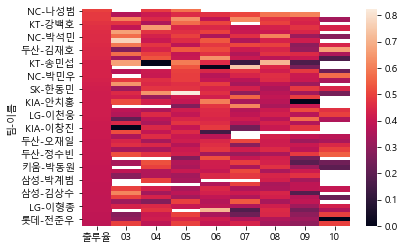

In [20]:
sns.heatmap(df_pruned)

월별 출루율을 히트맵으로 그려본다. 출루율 실적을 히트맵에 표현하고, 컬러맵은 Reds를 활용해 출루율이 높을 수록 붉은색이 진하게 표현하도록 한다.

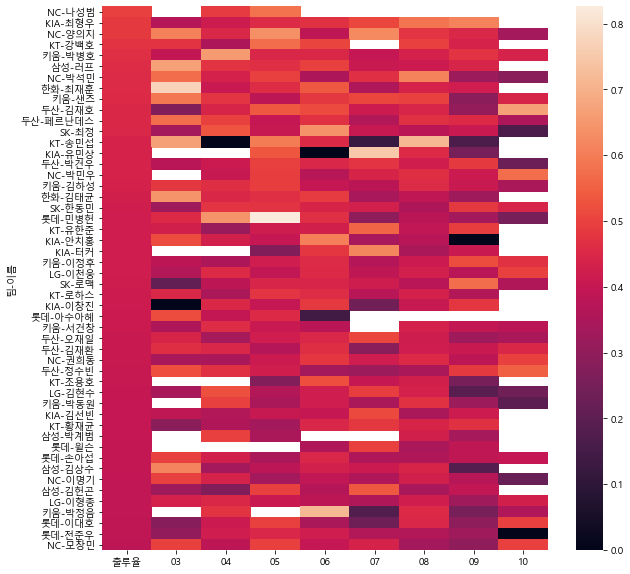

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_pruned)

값이 출력되도록 하기

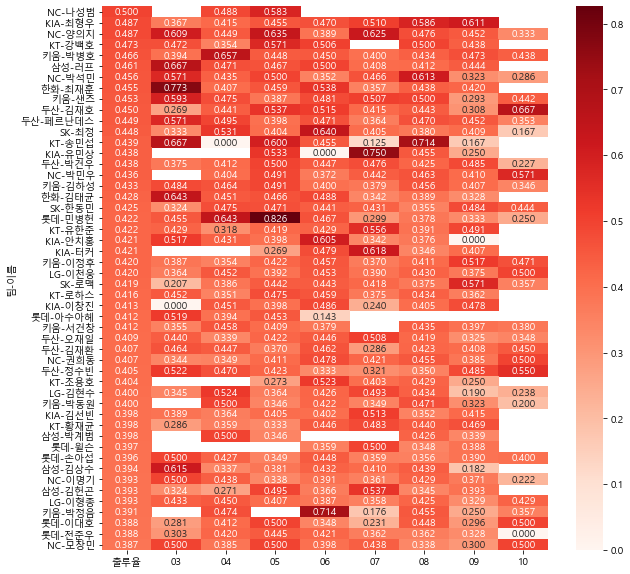

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_pruned, annot = True, fmt = '.3f',cmap ='Reds')

월별 출루율을 시즌 출루율 대비한 +- 값으로 변경해, 월별 변화 정도를 살펴본다.

In [23]:
for col in df_pruned.columns:
    if col=='출루율':
        continue
    df_pruned[col] = df_pruned[col] - df_pruned['출루율']

df_pruned['출루율'] = 0.0

df_pruned.head()

,,출루율,03,04,05,06,07,08,09,10
팀,이름,,,,,,,,,
NC,나성범,0.0,NaN,-0.012195,0.083333,NaN,NaN,NaN,NaN,NaN
KIA,최형우,0.0,-0.120567,-0.072600,-0.031788,-0.017355,0.022570,0.098973,0.123877,NaN
NC,양의지,0.0,0.121949,-0.038029,0.148388,-0.097858,0.138253,-0.010557,-0.035134,-0.153414
KT,강백호,0.0,-0.000751,-0.118806,0.098456,0.033051,NaN,0.027027,-0.035473,NaN
키움,박병호,0.0,-0.071924,0.190853,-0.017947,-0.015863,-0.065863,-0.031520,0.006864,-0.028363


시즌 전체 대비 월별 출루율 증감 실적을 히트맵으로 표현한다. +,- 값이 동시에 나오기 때문에, RdBu_r를 사용한다.

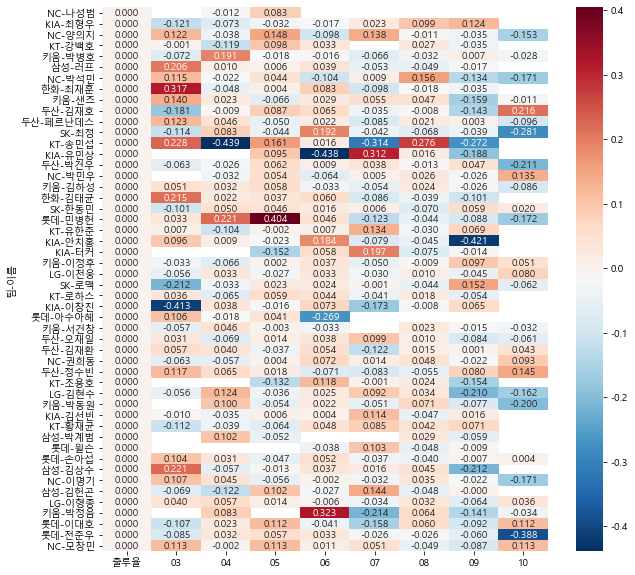

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_pruned, annot=True, fmt='.3f', cmap='RdBu_r')